# Experimental Template
The following notebook acts as a template for experiments. The one step not included is the data cleaning phase!
<br />
<br />
I have put FIXME tags next to the areas that you will need to address.
<br />
<br />
If you are curious to know more about how the code works, look at the `helper_functions.py` file.

## Imports and Setup

In [15]:
from helper_functions import pd, os, shutil
from helper_functions import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column

In [16]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.18.5
bitstring version:        3.1.9
joblib version:           1.1.0
PIL version:              8.2.0


## Data Loading and Cleaning

In [17]:
# FIXME - update the filename to point to your dataset
filename = '/mnt/sda1/iris.csv'
df = pd.read_csv(filename)

In [18]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# NOTE:
The following code segments are specific to my dataset. This is where you will need to perform your own data cleaning!!!
<br />
<br />
This will be the most difficult/time intensive aspect.

In [20]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
df = add_id_column(df, 'Species')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1-setosa,5.1,3.5,1.4,0.2,Iris-setosa
1,2-setosa,4.9,3.0,1.4,0.2,Iris-setosa
2,3-setosa,4.7,3.2,1.3,0.2,Iris-setosa
3,4-setosa,4.6,3.1,1.5,0.2,Iris-setosa
4,5-setosa,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,46-virginica,6.7,3.0,5.2,2.3,Iris-virginica
146,47-virginica,6.3,2.5,5.0,1.9,Iris-virginica
147,48-virginica,6.5,3.0,5.2,2.0,Iris-virginica
148,49-virginica,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
# FIXME - Perform any data cleaning or preprocessing steps here

In [22]:
# FIXME - get the correct values in x and Y for your dataset
x = df.drop(['Species', 'Id'], axis=1)
Y = df['Species']
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (150, 4)
Y (150,)
This value should be True: True


## Image Generation

In [23]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-iris"
feature_types = get_column_data_types(x)
precision = 64
one = 128
zero = 0
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
print(feature_types)

[0, 0, 0, 0]


In [24]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

## Place Folders into the Correct Categories

In [25]:
dirs = Y.unique().tolist()
if not os.path.exists(image_directory + '/data'):
    os.mkdir(image_directory + '/data')
new_dir = image_directory + '/data/'
if not os.path.exists(new_dir+'Train/'):
    os.mkdir(new_dir+'Train/')
for i in dirs:
    i = str(i).split('-')[1]
    if not os.path.exists(new_dir+'Train/'+i):
        os.mkdir(new_dir+'Train/'+i)

### Place pictures into the correct folder

In [26]:
total_images = 0
type_counts = {value.split("-")[1]: 0 for value in dirs}
for file in os.listdir(image_directory):
    try:
        dir = file.split("-")[1].split(".")[0]
    except:
        continue
    type_counts[dir]+=1
    shutil.move(f"{image_directory}/{file}", f"{new_dir}Train/{dir}/{file}")
    total_images += 1
print(total_images)
print(type_counts)

150
{'setosa': 50, 'versicolor': 50, 'virginica': 50}


## Train ResNet50

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./tensorboard.png)

In [1]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

2023-03-05 16:04:27.646662: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# FIXME - update the values below to match your dataset
img_size = 64
target_size = (img_size,img_size)
# Number of classification types
num_classes = 3
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 32
# Number of times to run through the entire dataset
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
number_of_epochs = 100

In [4]:
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

2023-03-05 16:04:30.202384: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-03-05 16:04:30.203219: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-03-05 16:04:30.233424: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-05 16:04:30.233822: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1080 computeCapability: 6.1
coreClock: 1.7715GHz coreCount: 20 deviceMemorySize: 7.92GiB deviceMemoryBandwidth: 298.32GiB/s
2023-03-05 16:04:30.233864: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-03-05 16:04:30.235765: I tensorflow/stream_executor/platform/d

Fold:  0
Found 120 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


2023-03-05 16:04:31.813439: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:04:31.813464: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 16:04:31.813492: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-03-05 16:04:31.814034: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2023-03-05 16:04:31.881904: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:04:31.882012: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 16:04:31.969739: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-05 16:04:31.988010: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 4200000000 Hz


Epoch 1/100


2023-03-05 16:04:35.962597: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-03-05 16:04:36.117443: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-03-05 16:04:36.687417: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-03-05 16:04:36.738172: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/4 [======>.......................] - ETA: 2:04 - loss: 1.4933 - acc: 0.2812 - f1_m: 0.2222 - precision_m: 0.2727 - recall_m: 0.1875 - auc: 0.4968 - false_negatives: 26.0000 - false_positives: 16.0000 - true_negatives: 48.0000 - true_positives: 6.0000 - mean_absolute_error: 0.4526 - mean_squared_error: 0.2891

2023-03-05 16:05:13.765252: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:05:13.765284: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.4207 - acc: 0.3158 - f1_m: 0.2708 - precision_m: 0.3398 - recall_m: 0.2257 - auc: 0.5201 - false_negatives: 56.0000 - false_positives: 31.5000 - true_negatives: 116.5000 - true_positives: 18.0000 - mean_absolute_error: 0.4370 - mean_squared_error: 0.2748

2023-03-05 16:05:50.020519: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 16:05:50.024996: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 16:05:50.036043: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 5816 callback api events and 5165 activity events. 
2023-03-05 16:05:50.102757: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:05:50.166096: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_16_05_50
2023-03-05 16:05:50.208627: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_16_05_50/drake-pc.trace.json.gz
2023-03-05 16:05:50.282269: I tensorflow/core

4/4 [==============================] - 94s 18s/step - loss: 1.4041 - acc: 0.3260 - f1_m: 0.2813 - precision_m: 0.3522 - recall_m: 0.2347 - auc: 0.5299 - false_negatives: 62.2000 - false_positives: 34.8000 - true_negatives: 131.6000 - true_positives: 21.0000 - mean_absolute_error: 0.4325 - mean_squared_error: 0.2714 - val_loss: 5.3515 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc: 0.5214 - val_false_negatives: 20.0000 - val_false_positives: 20.0000 - val_true_negatives: 40.0000 - val_true_positives: 10.0000 - val_mean_absolute_error: 0.4207 - val_mean_squared_error: 0.3867

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris/results/fold0-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 76ms/step - loss: 0.9866 - acc: 0.6477 - f1_m: 0.6576 - precision_m: 0.7211 - recall_m: 0.6049 - auc: 0.8261 - false_negatives: 34.2000 - false_positives: 21.400

2023-03-05 16:06:18.235574: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:06:18.235598: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 16:06:18.235710: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:06:18.235798: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.4578 - acc: 0.4297 - f1_m: 0.3796 - precision_m: 0.4659 - recall_m: 0.3203 - auc_1: 0.5703 - false_negatives_1: 32.0000 - false_positives_1: 17.0000 - true_negatives_1: 79.0000 - true_positives_1: 16.0000 - mean_absolute_error: 0.4143 - mean_squared_error: 0.2536

2023-03-05 16:06:22.103518: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:06:22.103545: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.3869 - acc: 0.4389 - f1_m: 0.3764 - precision_m: 0.4681 - recall_m: 0.3151 - auc_1: 0.5875 - false_negatives_1: 51.7500 - false_positives_1: 26.2500 - true_negatives_1: 125.7500 - true_positives_1: 24.2500 - mean_absolute_error: 0.4084 - mean_squared_error: 0.2465

2023-03-05 16:06:22.496514: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 16:06:22.500211: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 16:06:22.511652: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1741 callback api events and 1689 activity events. 
2023-03-05 16:06:22.550298: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:06:22.583835: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_16_06_22
2023-03-05 16:06:22.606614: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_16_06_22/drake-pc.trace.json.gz
2023-03-05 16:06:22.671595: I tensorflow/core

4/4 [==============================] - 5s 605ms/step - loss: 1.3740 - acc: 0.4395 - f1_m: 0.3731 - precision_m: 0.4662 - recall_m: 0.3115 - auc_1: 0.5917 - false_negatives_1: 58.2000 - false_positives_1: 29.2000 - true_negatives_1: 140.4000 - true_positives_1: 26.6000 - mean_absolute_error: 0.4073 - mean_squared_error: 0.2448 - val_loss: 10.9032 - val_acc: 0.3667 - val_f1_m: 0.3667 - val_precision_m: 0.3667 - val_recall_m: 0.3667 - val_auc_1: 0.5158 - val_false_negatives_1: 19.0000 - val_false_positives_1: 19.0000 - val_true_negatives_1: 41.0000 - val_true_positives_1: 11.0000 - val_mean_absolute_error: 0.4277 - val_mean_squared_error: 0.3553

Epoch 00001: val_acc improved from -inf to 0.36667, saving model to /mnt/sda1/image-results-iris/results/fold1-resnet50v2-saved-model-01-val_acc-0.37.hdf5
Epoch 2/100
4/4 [==============================] - 0s 71ms/step - loss: 0.8452 - acc: 0.7552 - f1_m: 0.6813 - precision_m: 0.7710 - recall_m: 0.6125 - auc_1: 0.8634 - false_negatives_1: 33.0000

2023-03-05 16:06:37.021593: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:06:37.021618: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 16:06:37.021725: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:06:37.021763: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.3526 - acc: 0.4107 - f1_m: 0.3417 - precision_m: 0.4062 - recall_m: 0.2969 - auc_2: 0.5599 - false_negatives_2: 27.0000 - false_positives_2: 17.0000 - true_negatives_2: 63.0000 - true_positives_2: 13.0000 - mean_absolute_error: 0.4203 - mean_squared_error: 0.2571

2023-03-05 16:06:40.772067: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:06:40.772092: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.3526 - acc: 0.4307 - f1_m: 0.3736 - precision_m: 0.4413 - recall_m: 0.3262 - auc_2: 0.5874 - false_negatives_2: 46.5000 - false_positives_2: 28.5000 - true_negatives_2: 115.5000 - true_positives_2: 25.5000 - mean_absolute_error: 0.4085 - mean_squared_error: 0.2517

2023-03-05 16:06:41.181509: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 16:06:41.184137: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 16:06:41.194948: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1741 callback api events and 1689 activity events. 
2023-03-05 16:06:41.229706: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:06:41.260679: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_16_06_41
2023-03-05 16:06:41.283569: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_16_06_41/drake-pc.trace.json.gz
2023-03-05 16:06:41.346088: I tensorflow/core

4/4 [==============================] - 5s 605ms/step - loss: 1.3568 - acc: 0.4363 - f1_m: 0.3838 - precision_m: 0.4547 - recall_m: 0.3344 - auc_2: 0.5954 - false_negatives_2: 52.2000 - false_positives_2: 31.4000 - true_negatives_2: 131.8000 - true_positives_2: 29.4000 - mean_absolute_error: 0.4049 - mean_squared_error: 0.2497 - val_loss: 2.8166 - val_acc: 0.4333 - val_f1_m: 0.4333 - val_precision_m: 0.4333 - val_recall_m: 0.4333 - val_auc_2: 0.5775 - val_false_negatives_2: 17.0000 - val_false_positives_2: 17.0000 - val_true_negatives_2: 43.0000 - val_true_positives_2: 13.0000 - val_mean_absolute_error: 0.3883 - val_mean_squared_error: 0.3301

Epoch 00001: val_acc improved from -inf to 0.43333, saving model to /mnt/sda1/image-results-iris/results/fold2-resnet50v2-saved-model-01-val_acc-0.43.hdf5
Epoch 2/100
4/4 [==============================] - 0s 69ms/step - loss: 0.9627 - acc: 0.6539 - f1_m: 0.6547 - precision_m: 0.7062 - recall_m: 0.6135 - auc_2: 0.8185 - false_negatives_2: 31.2000 

2023-03-05 16:06:52.344765: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:06:52.344790: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 16:06:52.344923: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:06:52.344978: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.3404 - acc: 0.5179 - f1_m: 0.4534 - precision_m: 0.4931 - recall_m: 0.4219 - auc_3: 0.5978 - false_negatives_3: 23.0000 - false_positives_3: 16.5000 - true_negatives_3: 63.5000 - true_positives_3: 17.0000 - mean_absolute_error: 0.3975 - mean_squared_error: 0.2446 

2023-03-05 16:06:56.033133: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:06:56.033157: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.3361 - acc: 0.5180 - f1_m: 0.4670 - precision_m: 0.5163 - recall_m: 0.4286 - auc_3: 0.6185 - false_negatives_3: 40.7500 - false_positives_3: 27.5000 - true_negatives_3: 116.5000 - true_positives_3: 31.2500 - mean_absolute_error: 0.3896 - mean_squared_error: 0.2398

2023-03-05 16:06:56.433070: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 16:06:56.434887: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 16:06:56.444107: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1741 callback api events and 1689 activity events. 
2023-03-05 16:06:56.475143: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:06:56.504369: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_16_06_56
2023-03-05 16:06:56.526369: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_16_06_56/drake-pc.trace.json.gz
2023-03-05 16:06:56.580412: I tensorflow/core

4/4 [==============================] - 5s 586ms/step - loss: 1.3279 - acc: 0.5194 - f1_m: 0.4713 - precision_m: 0.5234 - recall_m: 0.4309 - auc_3: 0.6247 - false_negatives_3: 46.0000 - false_positives_3: 30.6000 - true_negatives_3: 132.6000 - true_positives_3: 35.6000 - mean_absolute_error: 0.3873 - mean_squared_error: 0.2381 - val_loss: 4.9274 - val_acc: 0.3333 - val_f1_m: 0.3333 - val_precision_m: 0.3333 - val_recall_m: 0.3333 - val_auc_3: 0.5758 - val_false_negatives_3: 20.0000 - val_false_positives_3: 20.0000 - val_true_negatives_3: 40.0000 - val_true_positives_3: 10.0000 - val_mean_absolute_error: 0.4320 - val_mean_squared_error: 0.4217

Epoch 00001: val_acc improved from -inf to 0.33333, saving model to /mnt/sda1/image-results-iris/results/fold3-resnet50v2-saved-model-01-val_acc-0.33.hdf5
Epoch 2/100
4/4 [==============================] - 0s 69ms/step - loss: 1.4014 - acc: 0.6135 - f1_m: 0.5525 - precision_m: 0.6102 - recall_m: 0.5073 - auc_3: 0.7662 - false_negatives_3: 41.0000 

2023-03-05 16:07:07.466805: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:07:07.466829: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-05 16:07:07.466966: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:07:07.467056: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
2/4 [==============>...............] - ETA: 0s - loss: 1.7033 - acc: 0.3393 - f1_m: 0.2115 - precision_m: 0.2768 - recall_m: 0.1719 - auc_4: 0.4449 - false_negatives_4: 36.5000 - false_positives_4: 19.5000 - true_negatives_4: 68.5000 - true_positives_4: 7.5000 - mean_absolute_error: 0.4633 - mean_squared_error: 0.3008 

2023-03-05 16:07:11.819904: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-05 16:07:11.819952: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


4/4 [==============================] - ETA: 0s - loss: 1.6659 - acc: 0.3437 - f1_m: 0.2386 - precision_m: 0.3014 - recall_m: 0.1999 - auc_4: 0.4781 - false_negatives_4: 57.7500 - false_positives_4: 33.0000 - true_negatives_4: 115.0000 - true_positives_4: 16.2500 - mean_absolute_error: 0.4525 - mean_squared_error: 0.2947

2023-03-05 16:07:12.179496: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-05 16:07:12.181714: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-05 16:07:12.191202: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1728 callback api events and 1676 activity events. 
2023-03-05 16:07:12.222702: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-05 16:07:12.252904: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_16_07_12
2023-03-05 16:07:12.275262: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-iris/results/tb_logs/train/plugins/profile/2023_03_05_16_07_12/drake-pc.trace.json.gz
2023-03-05 16:07:12.333534: I tensorflow/core

4/4 [==============================] - 6s 589ms/step - loss: 1.6507 - acc: 0.3483 - f1_m: 0.2496 - precision_m: 0.3108 - recall_m: 0.2115 - auc_4: 0.4916 - false_negatives_4: 63.8000 - false_positives_4: 37.2000 - true_negatives_4: 129.2000 - true_positives_4: 19.4000 - mean_absolute_error: 0.4478 - mean_squared_error: 0.2917 - val_loss: 3.8380 - val_acc: 0.4333 - val_f1_m: 0.4333 - val_precision_m: 0.4333 - val_recall_m: 0.4333 - val_auc_4: 0.5778 - val_false_negatives_4: 17.0000 - val_false_positives_4: 17.0000 - val_true_negatives_4: 43.0000 - val_true_positives_4: 13.0000 - val_mean_absolute_error: 0.3891 - val_mean_squared_error: 0.3280

Epoch 00001: val_acc improved from -inf to 0.43333, saving model to /mnt/sda1/image-results-iris/results/fold4-resnet50v2-saved-model-01-val_acc-0.43.hdf5
Epoch 2/100
4/4 [==============================] - 0s 70ms/step - loss: 1.0327 - acc: 0.7402 - f1_m: 0.7280 - precision_m: 0.7451 - recall_m: 0.7125 - auc_4: 0.8486 - false_negatives_4: 23.4000 

In [5]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.04664125961717218, 'acc': 0.9816666603088379, 'f1_m': 0.9817708253860473, 'precision_m': 0.9817708373069763, 'recall_m': 0.9817708373069763, 'auc': 0.9979861378669739, 'false_negatives': 4.0, 'false_positives': 4.0, 'true_negatives': 236.0, 'true_positives': 116.0, 'mean_absolute_error': 0.023830056213773786, 'mean_squared_error': 0.008538454546578578, 'val_loss': 0.6148764431476593, 'val_acc': 0.8466666579246521, 'val_f1_m': 0.8466666102409363, 'val_precision_m': 0.8466666579246521, 'val_recall_m': 0.8466666579246521, 'val_auc': 0.9733332395553589, 'val_false_negatives': 4.0, 'val_false_positives': 4.0, 'val_true_negatives': 56.0, 'val_true_positives': 26.0, 'val_mean_absolute_error': 0.10374443978071213, 'val_mean_squared_error': 0.07977678775787353, 'lr': 0.00030539997883352046}


In [6]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.0028186142444610596, 'acc': 1.0, 'f1_m': 1.0, 'precision_m': 1.0, 'recall_m': 1.0, 'auc_3': 0.9999999403953552, 'false_negatives_3': 0.0, 'false_positives_3': 0.0, 'true_negatives_3': 240.0, 'true_positives_3': 120.0, 'mean_absolute_error': 0.0017979273106902838, 'mean_squared_error': 0.0001470522693125531, 'val_loss': 0.6610658168792725, 'val_acc': 0.8999999761581421, 'val_f1_m': 0.8999999165534973, 'val_precision_m': 0.8999999761581421, 'val_recall_m': 0.8999999761581421, 'val_auc_3': 0.9422222375869751, 'val_false_negatives_3': 3.0, 'val_false_positives_3': 3.0, 'val_true_negatives_3': 57.0, 'val_true_positives_3': 27.0, 'val_mean_absolute_error': 0.07801878452301025, 'val_mean_squared_error': 0.06345812976360321, 'lr': 0.00049999997}


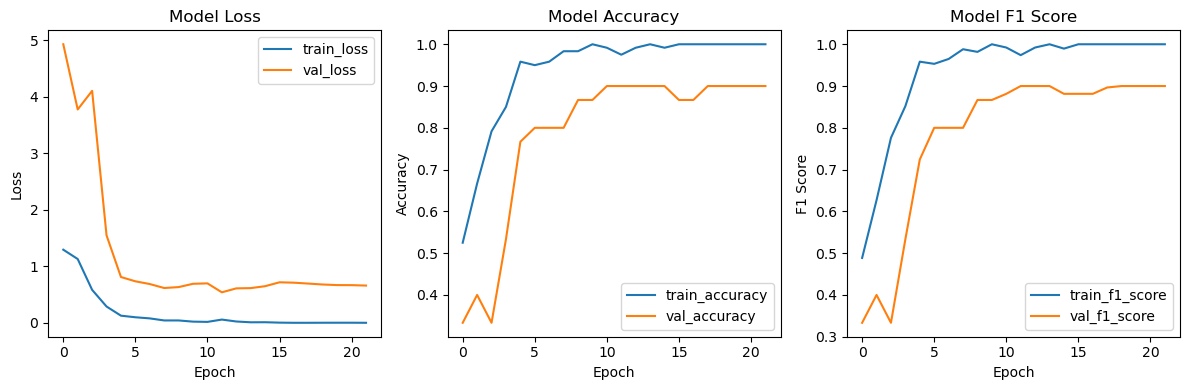

In [7]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [5]:
def order_columns_by_correlation(df: pd.DataFrame, label: str) -> list:
    '''
        Order the columns of the dataframe in a sequence where the first element is the column most correlated with the label
            and every success element is the remaining column most correlated with its predecessor
    '''

    current_columns : pd.DataFrame = df.columns.copy()
    new_df          : pd.DataFrame = df.copy()
    new_column_order: list = []
    label_class_map : dict = {}

    print(f'ordering columns by correlation: {label}, {len(current_columns)}, {df[label].unique()}')

    for i, category in enumerate(df[label].unique()):
        label_class_map[category] = i

    new_df[label] = new_df[label].map(label_class_map)


    current: str = label
    last: str = None

    while len(current_columns) > 1:
        last = current
        current_columns = current_columns.drop(current)
        current = new_df[current_columns].corrwith(new_df[current]).abs().idxmax()
        new_column_order.append(current)

        # print(f'current: {current}, last: {last}, iteration: {len(new_column_order)}, columns: {len(current_columns)}')


    return new_column_order

Found 54 images belonging to 3 classes.
2/2 [==============================] - 19s 18s/step - loss: 0.5577 - acc: 0.8719 - recall_m: 0.8712 - auc_3: 0.9402 - false_negatives_3: 6.0000 - false_positives_3: 6.0000 - true_negatives_3: 87.3333 - true_positives_3: 40.6667 - mean_absolute_error: 0.1086 - mean_squared_error: 0.0802
[0.5954808592796326, 0.8703703880310059, 0.8693181872367859, 0.935442328453064, 7.0, 7.0, 101.0, 47.0, 0.10876356065273285, 0.08314419537782669]
